# Part I - Ford GoBike System Data
## by Oluwaseyi Aderemi

## Introduction

This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area. The data was collected from e-bikes used over a period of time, and my aim for this project is to find out as much information as I can from this dataset and covey it efficiently and effectively.

## Preliminary Wrangling

In [5]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sb
from functions import *
import geopy.distance

sb.set_style('whitegrid')
%matplotlib inline

# Increasing the font size for the visualizations.
font = {'family' : 'roboto',
        'weight' : 'regular',
        'size'   : 12}

matplotlib.rc('font', **font)

In [6]:
df = pd.read_csv("201902-fordgobike-tripdata.csv")
print(f'Shape of dataset: {df.shape}')
print(f'Unique bike_ids: {df.bike_id.nunique()}')
df.head()

Shape of dataset: (183412, 16)
Unique bike_ids: 4646


,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [7]:
df.start_time = df.start_time.astype('datetime64')
df.end_time = df.end_time.astype('datetime64')
df.user_type = df.user_type.astype('category')
df.member_gender = df.member_gender.astype('category')
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             183412 non-null  int64         
 1   start_time               183412 non-null  datetime64[ns]
 2   end_time                 183412 non-null  datetime64[ns]
 3   start_station_id         183215 non-null  float64       
 4   start_station_name       183215 non-null  object        
 5   start_station_latitude   183412 non-null  float64       
 6   start_station_longitude  183412 non-null  float64       
 7   end_station_id           183215 non-null  float64       
 8   end_station_name         183215 non-null  object        
 9   end_station_latitude     183412 non-null  float64       
 10  end_station_longitude    183412 non-null  float64       
 11  bike_id                  183412 non-null  int64         
 12  user_type       

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.789,2019-03-01 06:42:03.056,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [8]:
df.dropna(inplace = True)

# Data transformation from birth year to age.
df['member_age'] = 2019 - df.member_birth_year
df = df.query("member_age < 65")

# Data transformation from seconds to minutes.
df['duration_min'] = df.duration_sec / 60

# Data transformation from coordinates to distance in km using geopy package.
def get_distance(r):
    """This function converts coordinates to distance in kilometers"""
    coords_1 = (r.start_station_latitude, r.start_station_longitude)
    coords_2 = (r.end_station_latitude, r.end_station_longitude)

    return geopy.distance.geodesic(coords_1, coords_2).km

df['distance'] = df.apply(get_distance, axis = 1)
df.to_csv('df_clean.csv', index = True)

### Structure of the dataset:

> The dataset had 183412 rows and 16 columns, however I have noticed some missing data in some columns. There are 4646 unique bike ids leading me to believe that we have that number of e-bikes in our system.

### Main features of interest in the dataset:

> duration and distance travelled by users.

### Features in the dataset that will help support my investigation into the features of interest:

> user_type, member_birth_year, member_gender.

## Univariate Exploration

### Question: What gender is most prevalent in this dataset?

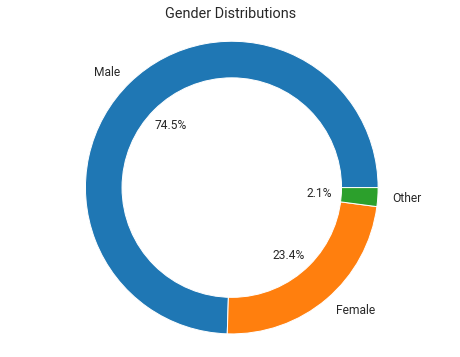

In [9]:
# Visualization
data = df.member_gender.value_counts()
univ_plot('donut', data, labels = data.index, figsize=(8,6), title = "Gender Distributions")

### Observation:
> The males occur the most frequently followed by females and the other genders are the least frequent.

### Question: What type of user is most apparent?

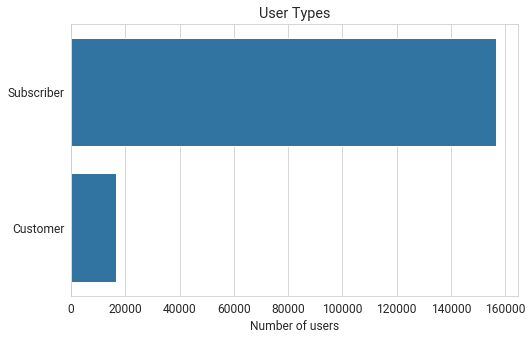

In [10]:
# Visualization
data = df.user_type.value_counts()
univ_plot('barh', df.user_type, order = data.index, figsize=(8,5), title = "User Types", xlabel = 'Number of users')

### Observation:
> Approximately 90% of users are subscribers while the others are just random customers.

### Question: What age ranges of people make use of the bikes?

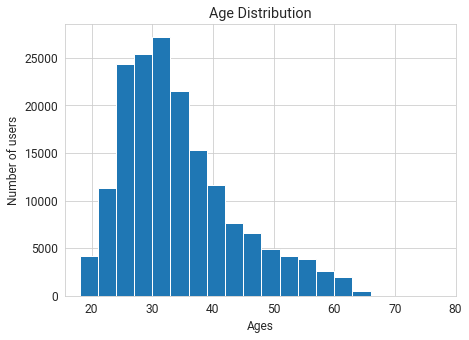

In [11]:
# Visualization
bins = bin_gen(df.member_age, 3)
univ_plot('hist', df.member_age, bins=bins, title = "Age Distribution", xlabel = "Ages", ylabel = 'Number of users')
plt.xlim(xmax = 80);

### Observation:
> People within the ages of 20 to 40 years used the bikes.

### Question: How long are people using the bicycles?

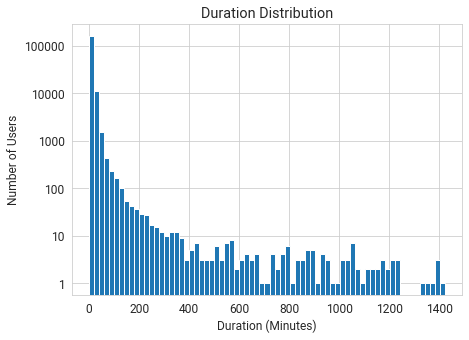

In [12]:
# Visualization

bins = bin_gen(df.duration_min, 20)
univ_plot('hist', df.duration_min, bins = bins, title = "Duration Distribution", xlabel = "Duration (Minutes)", ylabel = "Number of Users")
# plt.xlim(0, 180);
plt.yscale('log');
ticks = [1, 10, 100, 1000, 10000, 100000]
plt.yticks(ticks = ticks,labels = ticks);

### Observation:
> Most people tend to use the bicycles for not more 2 hours at a time.

### Question: Which bikes are used the most?

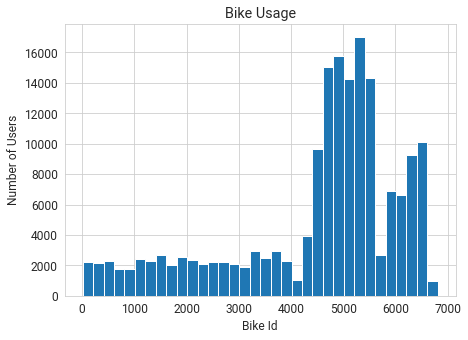

In [13]:
# Visualization
bins = bin_gen(df.bike_id, 200)
univ_plot('hist', df.bike_id, bins = bins, title = "Bike Usage", xlabel = "Bike Id", ylabel = "Number of Users")

### Observation:
> Bikes with ids above 4000 tend to experience more usage than the others. This maybe due to where they are stationed in the San Francisco Bay Area.

### Question: How much distance do these bikes travel at a time?

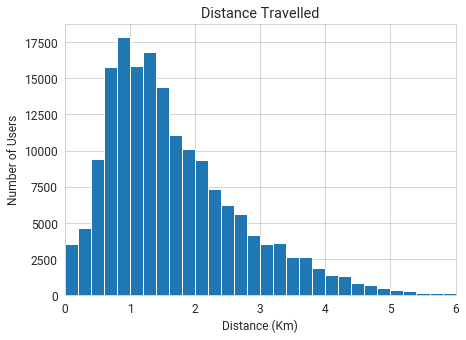

In [14]:
univ_plot('hist', df.distance, bins = bin_gen(df.distance, 0.2),title = 'Distance Travelled', xlabel = "Distance (Km)", ylabel = "Number of Users")
plt.xlim(0, 6);

### Observation:
> The bikes are mostly used to travel between 1 to 2 kilometers.
>
> I didn't notice any glaring need for transformations as my independent variables were mostly things like age, time and distance. But I had to make extensive use of limits in my plotting to show the areas of interest.


## Bivariate Exploration

### Question: Which gender uses the bikes for the longest duration and distance, and what are their types?

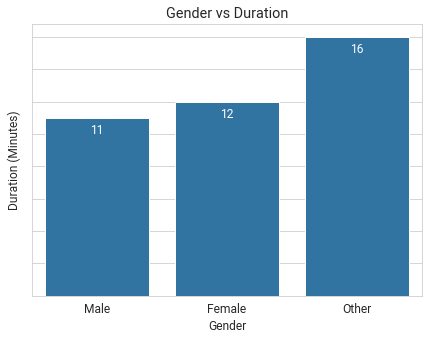

In [25]:
# Duration in minutes
data = df.groupby('member_gender').mean().duration_min.sort_values()
data = data.reset_index()
data.duration_min = data.duration_min.astype(int)
bi_plot('bar', data, x = 'member_gender', y = 'duration_min', order = ['Male', 'Female', 'Other'], title = "Gender vs Duration", xlabel = 'Gender',ylabel = "Duration (Minutes)")
plt.yticks(ticks = np.arange(0, 16+2, 2), labels = []);
for i, num in enumerate(data.duration_min):
    plt.text(i, num-1, str(num), horizontalalignment = 'center', c = 'white')

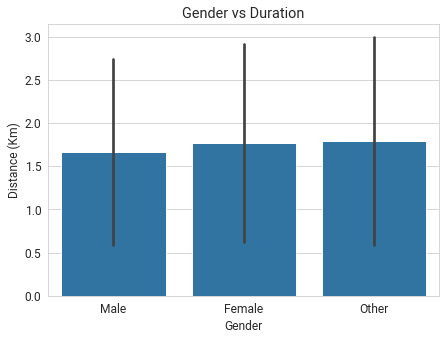

In [26]:
bi_plot('bar', df, x = 'member_gender', y = 'distance', order = ['Male', 'Female', 'Other'], title = "Gender vs Distance", xlabel = 'Gender', ylabel = "Distance (Km)")

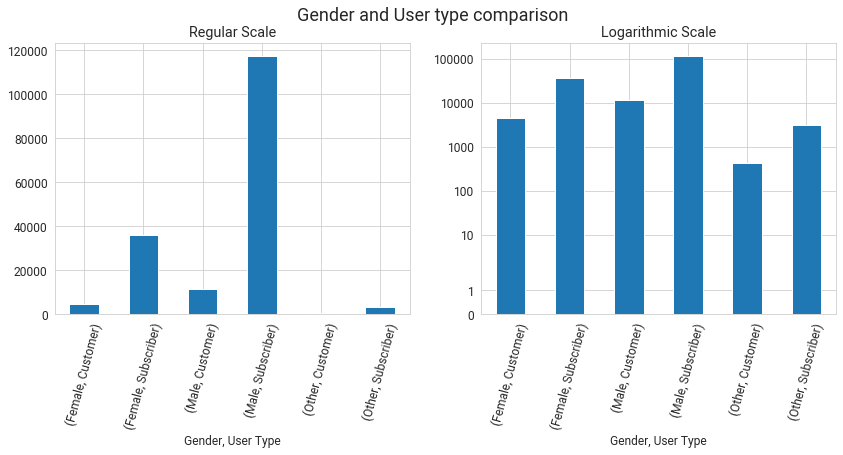

In [17]:
data = df.groupby(['member_gender', 'user_type']).count().bike_id
ticks = [0, 1, 10, 100, 1000, 10000, 100000]
plt.figure(figsize = (14, 5));
plt.subplot(1, 2, 1);
data.plot(kind = 'bar', xlabel = 'Gender, User Type', title = 'Regular Scale');
plt.xticks(rotation = 75);
plt.subplot(1, 2, 2);
data.plot(kind = 'bar', xlabel = 'Gender, User Type', logy = 'sym', title = 'Logarithmic Scale');
plt.yticks(ticks, ticks);
plt.xticks(rotation = 75);
plt.suptitle('Gender and User type comparison', fontsize = 18);

### Observations
> By duration, males spend the least average time on the bicycles. This conclusion is lacking due to the fact that most users are male.  

> By distance, males also travel the least distance followed by females and the other genders travel the farthest. This data also seems to be skewed due to the large difference between the population of each gender.  

> Finally most subscribers and customers are male followed by females. I used a logarithmic scale to show some values that seemed nonexistent with a regular scale.

### Question: What are the ages of users and how does their performance change?

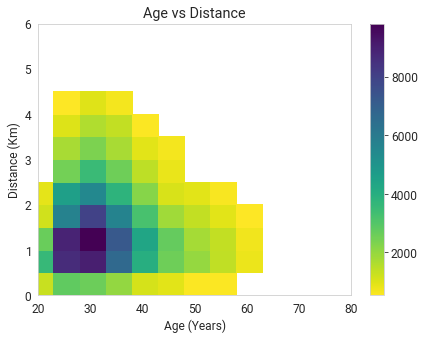

In [18]:
# Age vs distance
bin_x = bin_gen(df.member_age, 5)
bin_y = bin_gen(df.distance, 0.5)
bins = [bin_x, bin_y]
bi_plot('heat', df, 'member_age', 'distance', bins = [bin_x, bin_y], title = 'Age vs Distance', xlabel = 'Age (Years)', ylabel = 'Distance (Km)');
plt.xlim(20, 80);
plt.ylim(0, 6);

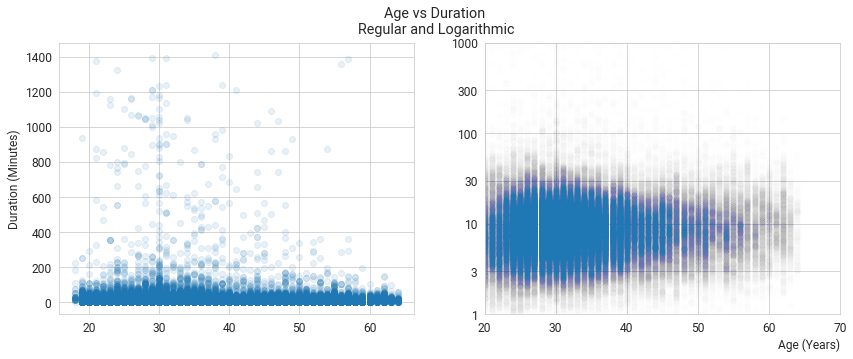

In [19]:
# age vs duration
plt.figure(figsize = (14, 5));
plt.suptitle('Age vs Duration \nRegular and Logarithmic');

plt.subplot(1,2,1);
plt.scatter(data = df, x = 'member_age', y = 'duration_min', alpha = 1/10);
plt.ylabel('Duration (Minutes)');
plt.subplot(1,2,2);
plt.scatter(data = df, x = 'member_age', y = 'duration_min', alpha = 1/500);
plt.xlim(20, 70);
plt.ylim(1, 1000);
plt.yscale('log');
ticks = [1, 3, 10, 30, 100, 300, 1000]
plt.yticks(ticks = ticks, labels = ticks);
plt.xlabel('Age (Years)', loc = 'right');    

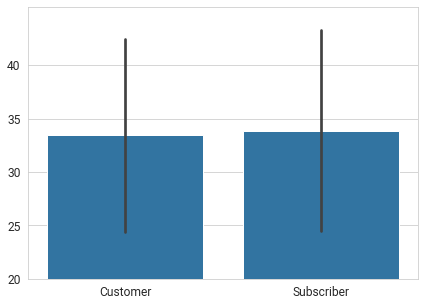

In [20]:
bi_plot('bar', df, 'user_type', 'member_age')
plt.yticks(np.arange(20, 45, 5));
plt.ylim(bottom = 20);

### Observations
> There seems to be some form of positive correlation between age and distance. Users are mostly between ages 20 and 50. and they tend to use the bikes for not more than 3 km at once.

> By comparing age and duration I found out that most people use the bikes for not more than 30 minutes at once. The ones that do are mostly between the ages 20 to 50.

> Finally the average customers and subscribers are between the ages 30 and 35.

### Question: What bikes have seen the most use?

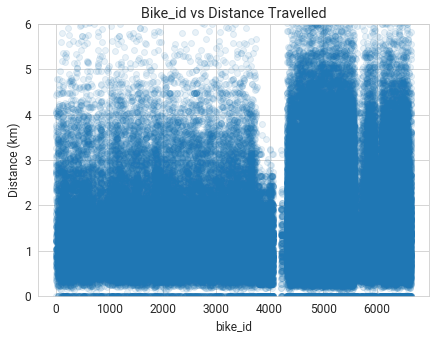

In [21]:

bi_plot('scatter', df, 'bike_id', 'distance', title = 'Bike_id vs Distance Travelled', xlabel = 'bike_id', ylabel = 'Distance (km)');
plt.ylim(0, 6);

### Observations
> There is a rift between the bike_ids and bikes before this rift have travelled on average, less distance than the bikes after this rift.

## Multivariate Exploration

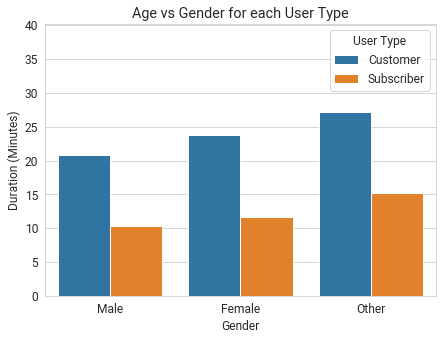

In [22]:
plt.figure(figsize = (7, 5));
sb.barplot(data = df, x = 'member_gender', order = ['Male', 'Female', 'Other'], y = 'duration_min', hue = 'user_type', errwidth = 0);
plt.title('Age vs Gender for each User Type');
plt.xlabel('Gender');
plt.ylabel('Duration (Minutes)');
plt.legend(title = 'User Type', loc = 1);

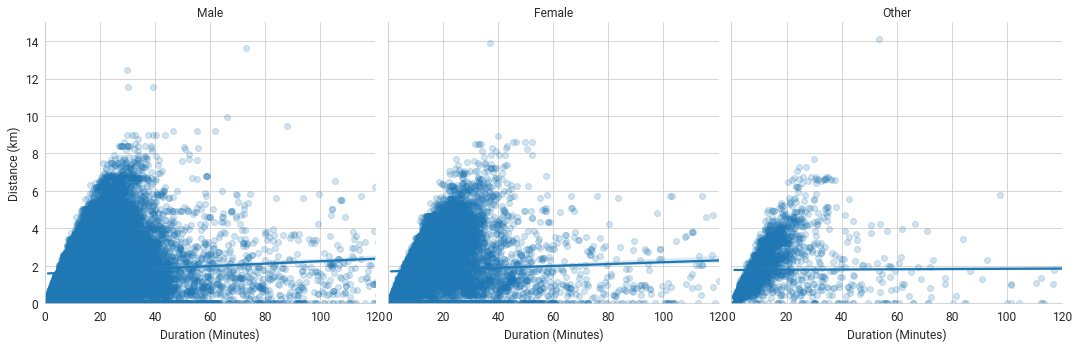

In [23]:
g = sb.FacetGrid(data = df, col = 'member_gender', col_order = ['Male', 'Female', 'Other'], height = 5)
g.map(sb.regplot, 'duration_min', 'distance', fit_reg = True, scatter_kws = {'alpha': 1/5});
g.set(ylim = (0, 15), xlim = (0, 120), xlabel = 'Duration (Minutes)', ylabel = 'Distance (km)');
g.set_titles('{col_name}');

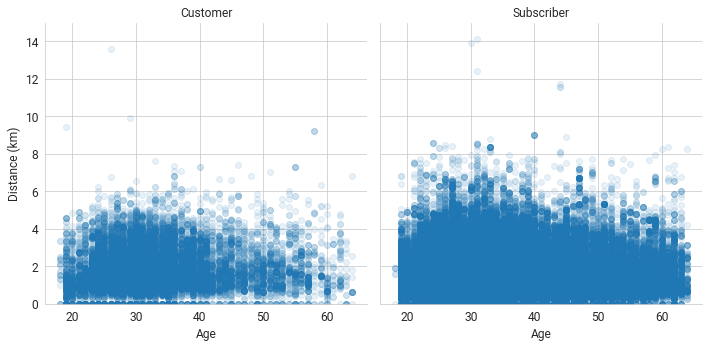

In [24]:
g = sb.FacetGrid(data = df, col = 'user_type', height = 5)
g.map(sb.regplot, 'member_age', 'distance', fit_reg = False, scatter_kws = {'alpha': 1/10});
g.set(ylim = (0, 15));
g.set_titles('{col_name}');
g.set(xlabel = 'Age', ylabel = 'Distance (km)');

### Observations

> Males use the bikes to travel longer distances and spend more time as well.  
> Also, customers are mostly younger than subscribers and travel less distances on average.


> From the Faceting approach I found out that the average values do not do justice to the males due to their large population.

## Conclusions
  > From my analysis on this dataset, I have made the following findings:  
  > * Majority of the users of this service are the male gender, with aproximately 75% of the population serviced. They tend to use the bikes to travel longer distances and also use them for longer, however this can't be seen by using the mean due to the sheer magnitude of their population.  
  > * The difference in the population of customers vs subscribers is glaring. Subscribers have a larger range of ages and distance travelled with the bikes.
  > * Users are mostly between ages 20 and 50. and they tend to use the bikes for not more than 3 km at a go. Younger people seem to travel longer distances and older people travel shorter distances.  
  > * Bikes with id above 4000 have seen more usage and have travelled more distance than the others. This maybe due to where they are located or maybe the bikes with this id are more durable or have more battery life.  
